In [3]:
import os; os.chdir("../../..")
print(os.getcwd())
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from lib.evals.models.metrics import aggregate_metrics, graph_training_evolution
from lib.formulas.q_learning import QLearning
from lib.policies.GreedyPolicy import GreedyPolicy

/Users/romainm/Desktop/SciencesPo/Doctorat


In [4]:
SEED = np.random.randint(500)
TRAINING_EPISODES = 2000

100%|███████████████████████████████████████████████| 2000/2000 [00:04<00:00, 456.42it/s]


mean=0.9305 std=43.293586935595904 max=9.0 min=-542.0


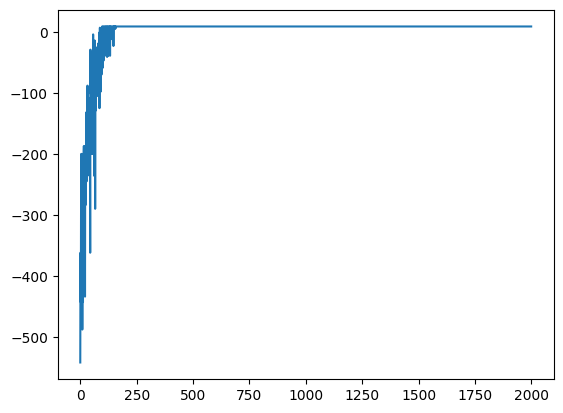

In [5]:
env = gym.make("Taxi-v3", render_mode="ansi")
policy = GreedyPolicy(
    game_env=env,
    seed=SEED
)
q_learning = QLearning(
    policy=policy,
    observation_space=env.observation_space.n,
    action_space=env.action_space.n,
    advantage=False,
    max_steps=200,
    gamma=0.7,
    lr=0.1
)
q_learning_metrics = q_learning.train(TRAINING_EPISODES)
print(aggregate_metrics(q_learning_metrics))
graph_training_evolution(q_learning_metrics)